1. 处理离散数据
2. 处理丢失的数据特征
3. 对数据进行标准化

#### 房价预测问题

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('../kaggle-data/House Prices/train.csv')
test = pd.read_csv('../kaggle-data/House Prices/test.csv')

In [2]:
#数据预处理，具体查看data-handle目录
cols = ['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
        'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 
        'Fireplaces', 'BsmtFinSF1','LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'CentralAir', 'BsmtFullBath', 'BsmtUnfSF', 'Neighborhood',
       'BedroomAbvGr', 'ScreenPorch',
        'SalePrice']
train = train.loc[:, cols]
train.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,OpenPorchSF,HalfBath,LotArea,CentralAir,BsmtFullBath,BsmtUnfSF,Neighborhood,BedroomAbvGr,ScreenPorch,SalePrice
0,1,7,1710,2,548,856,856,2,8,2003,...,61,1,8450,Y,1,150,CollgCr,3,0,208500
1,2,6,1262,2,460,1262,1262,2,6,1976,...,0,0,9600,Y,0,284,Veenker,3,0,181500
2,3,7,1786,2,608,920,920,2,6,2001,...,42,1,11250,Y,1,434,CollgCr,3,0,223500
3,4,7,1717,3,642,756,961,1,7,1915,...,35,0,9550,Y,1,540,Crawfor,3,0,140000
4,5,8,2198,3,836,1145,1145,2,9,2000,...,84,1,14260,Y,1,490,NoRidge,4,0,250000


In [3]:
test = test.loc[:, cols]
test.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,OpenPorchSF,HalfBath,LotArea,CentralAir,BsmtFullBath,BsmtUnfSF,Neighborhood,BedroomAbvGr,ScreenPorch,SalePrice
0,1461,5,896,1.0,730.0,882.0,896,1,5,1961,...,0,0,11622,Y,0.0,270.0,NAmes,2,120,NaN
1,1462,6,1329,1.0,312.0,1329.0,1329,1,6,1958,...,36,1,14267,Y,0.0,406.0,NAmes,3,0,NaN
2,1463,5,1629,2.0,482.0,928.0,928,2,6,1997,...,34,1,13830,Y,0.0,137.0,Gilbert,3,0,NaN
3,1464,6,1604,2.0,470.0,926.0,926,2,7,1998,...,36,1,9978,Y,0.0,324.0,Gilbert,3,0,NaN
4,1465,8,1280,2.0,506.0,1280.0,1280,2,5,1992,...,82,0,5005,Y,0.0,1017.0,StoneBr,2,144,NaN


In [4]:
all_X = pd.concat((train.loc[:, 'OverallQual':'ScreenPorch'], test.loc[:, 'OverallQual': 'ScreenPorch']))

In [5]:
all_X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir,BsmtFullBath,BsmtUnfSF,Neighborhood,BedroomAbvGr,ScreenPorch
0,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,...,854,61,1,8450,Y,1.0,150.0,CollgCr,3,0
1,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,...,0,0,0,9600,Y,0.0,284.0,Veenker,3,0
2,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,...,866,42,1,11250,Y,1.0,434.0,CollgCr,3,0
3,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,...,756,35,0,9550,Y,1.0,540.0,Crawfor,3,0
4,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,...,1053,84,1,14260,Y,1.0,490.0,NoRidge,4,0


In [6]:
train.shape

(1460, 28)

In [7]:
test.shape

(1459, 28)

In [8]:
#数据标准化处理
numeric_feats = all_X.dtypes[all_X.dtypes != 'object'].index
all_X[numeric_feats] = all_X[numeric_feats].apply(lambda x : (x - x.mean()) / (x.std()))

In [9]:
# 把离散的数据点转成数值标签
all_X = pd.get_dummies(all_X, dummy_na=True)
all_X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan
0,0.646073,0.413476,0.306423,0.348780,-0.444176,-0.773728,0.781232,0.986680,1.046078,0.896679,...,0,0,0,0,0,0,0,0,0,0
1,-0.063174,-0.471810,0.306423,-0.059772,0.476948,0.261030,0.781232,-0.287709,0.154737,-0.395536,...,0,0,0,0,0,0,0,0,1,0
2,0.646073,0.563659,0.306423,0.627338,-0.298974,-0.610614,0.781232,-0.287709,0.980053,0.848819,...,0,0,0,0,0,0,0,0,0,0
3,0.646073,0.427309,1.619406,0.785188,-0.671053,-0.506118,-1.027187,0.349486,-1.859033,-0.682695,...,0,0,0,0,0,0,0,0,0,0
4,1.355319,1.377806,1.619406,1.685860,0.211501,-0.037164,0.781232,1.623875,0.947040,0.753100,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 把缺失数据用本特征的平均值估计
all_X = all_X.fillna(all_X.mean())

In [11]:
# 转换数据格式
num_train = train.shape[0]

X_train = all_X[:num_train].as_matrix()
X_test = all_X[num_train:].as_matrix()
y_train = train.SalePrice.as_matrix()

In [12]:
train.size

40880

In [13]:
num_train

1460

In [14]:
X_train.size

77380

In [15]:
X_test.size

77327

In [16]:
# 转换为gluon的ndArray格式
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

X_train = nd.array(X_train)
y_train = nd.array(y_train)
y_train.reshape((num_train, 1))

X_test = nd.array(X_test)

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [17]:
# 损失函数 平方误差
square_loss = gluon.loss.L2Loss()

In [18]:
# 比赛中测量结果的函数
def get_rmse_log(net, X_train, y_train):
    num_train = X_train.shape[0]
    clipped_preds = nd.clip(net(X_train), 1, float('inf'))
    return np.sqrt(2 * nd.sum(square_loss(nd.log(clipped_preds), nd.log(y_train))).asscalar()/ num_train)

In [19]:
# 定义模型
def get_net():
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Flatten())
        net.add(gluon.nn.Dense(512, activation='relu'))
        net.add(gluon.nn.Dropout(0.5))
        net.add(gluon.nn.Dense(1))
    net.initialize()
    return net

In [20]:
# 训练函数
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

def train(net, X_train, y_train, X_test, y_test, epochs, verbose_epoch, learning_rate, weight_decay):
    train_loss = []
    if X_test is not None:
        test_loss = []
    batch_size = 16
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': learning_rate, 'wd': weight_decay})
    net.collect_params().initialize(force_reinit=True)
    for epoch in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            
            cur_train_loss = get_rmse_log(net, X_train, y_train)
        if epoch > verbose_epoch:
            print('epoch %d, train loss: %f' %(epoch, cur_train_loss))
        train_loss.append(cur_train_loss)
        if X_test is not None:
            cur_test_loss = get_rmse_log(net, X_test, y_test)
            test_loss.append(cur_test_loss)
    plt.plot(train_loss)
    plt.legend(['train'])
    if X_test is not None:
        plt.plot(test_loss)
        plt.legend(['train', 'test'])
    plt.show()
    if X_test is not None:
        return cur_train_loss, cur_test_loss
    else:
        return cur_train_loss

#### K折交叉验证
过度依赖训练数据集的误差来推断测试数据集的误差容易导致过拟合。事实上，当我们调参时，往往需要基于K折交叉验证。
>在K折交叉验证中，我们把初始采样分割成K个子样本，一个单独的子样本被保留作为验证模型的数据，其他K-1个样本用来训练

我们关心K次验证模型的测试结果的平均值和训练误差的平均值，因此我们定义K折交叉验证函数如下：

In [21]:
def k_fold_cross_valid(k, epochs, verbose_epoch, X_train, y_train,
                       learning_rate, weight_decay):
    assert k > 1
    fold_size = X_train.shape[0] // k
    train_loss_sum = 0.0
    test_loss_sum = 0.0
    for test_i in range(k):
        X_val_test = X_train[test_i * fold_size: (test_i + 1) * fold_size, :]
        y_val_test = y_train[test_i * fold_size: (test_i + 1) * fold_size]

        val_train_defined = False
        for i in range(k):
            if i != test_i:
                X_cur_fold = X_train[i * fold_size: (i + 1) * fold_size, :]
                y_cur_fold = y_train[i * fold_size: (i + 1) * fold_size]
                if not val_train_defined:
                    X_val_train = X_cur_fold
                    y_val_train = y_cur_fold
                    val_train_defined = True
                else:
                    X_val_train = nd.concat(X_val_train, X_cur_fold, dim=0)
                    y_val_train = nd.concat(y_val_train, y_cur_fold, dim=0)
        net = get_net()
        train_loss, test_loss = train(
            net, X_val_train, y_val_train, X_val_test, y_val_test,
            epochs, verbose_epoch, learning_rate, weight_decay)
        train_loss_sum += train_loss
        print("Test loss: %f" % test_loss)
        test_loss_sum += test_loss
    return train_loss_sum / k, test_loss_sum / k

In [22]:
k = 5
epochs = 200
verbose_epoch = 90
learning_rate = 0.01
weight_decay = 0

epoch 91, train loss: 0.159755
epoch 92, train loss: 0.159430
epoch 93, train loss: 0.159277
epoch 94, train loss: 0.159089
epoch 95, train loss: 0.158691
epoch 96, train loss: 0.158517
epoch 97, train loss: 0.158408
epoch 98, train loss: 0.158042
epoch 99, train loss: 0.157860
epoch 100, train loss: 0.157459
epoch 101, train loss: 0.157357
epoch 102, train loss: 0.157110
epoch 103, train loss: 0.156812
epoch 104, train loss: 0.156679
epoch 105, train loss: 0.156637
epoch 106, train loss: 0.156377
epoch 107, train loss: 0.156094
epoch 108, train loss: 0.155973
epoch 109, train loss: 0.155679
epoch 110, train loss: 0.155391
epoch 111, train loss: 0.155310
epoch 112, train loss: 0.155064
epoch 113, train loss: 0.154887
epoch 114, train loss: 0.154899
epoch 115, train loss: 0.154488
epoch 116, train loss: 0.154305
epoch 117, train loss: 0.154130
epoch 118, train loss: 0.153880
epoch 119, train loss: 0.153481
epoch 120, train loss: 0.153808
epoch 121, train loss: 0.153596
epoch 122, train 

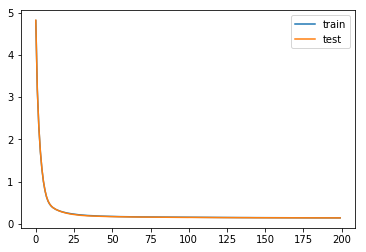

Test loss: 0.144253
epoch 91, train loss: 0.151493
epoch 92, train loss: 0.151074
epoch 93, train loss: 0.150856
epoch 94, train loss: 0.150577
epoch 95, train loss: 0.150298
epoch 96, train loss: 0.150126
epoch 97, train loss: 0.150000
epoch 98, train loss: 0.149759
epoch 99, train loss: 0.149379
epoch 100, train loss: 0.149434
epoch 101, train loss: 0.148983
epoch 102, train loss: 0.148837
epoch 103, train loss: 0.148420
epoch 104, train loss: 0.148389
epoch 105, train loss: 0.147967
epoch 106, train loss: 0.147835
epoch 107, train loss: 0.147726
epoch 108, train loss: 0.147385
epoch 109, train loss: 0.147314
epoch 110, train loss: 0.147543
epoch 111, train loss: 0.147006
epoch 112, train loss: 0.146639
epoch 113, train loss: 0.146345
epoch 114, train loss: 0.146416
epoch 115, train loss: 0.146150
epoch 116, train loss: 0.146051
epoch 117, train loss: 0.145687
epoch 118, train loss: 0.145673
epoch 119, train loss: 0.145440
epoch 120, train loss: 0.145434
epoch 121, train loss: 0.1449

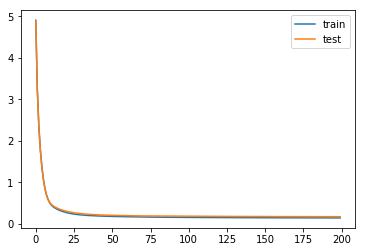

Test loss: 0.167163
epoch 91, train loss: 0.153032
epoch 92, train loss: 0.152785
epoch 93, train loss: 0.152640
epoch 94, train loss: 0.152330
epoch 95, train loss: 0.152207
epoch 96, train loss: 0.151903
epoch 97, train loss: 0.151612
epoch 98, train loss: 0.151298
epoch 99, train loss: 0.151101
epoch 100, train loss: 0.150831
epoch 101, train loss: 0.150660
epoch 102, train loss: 0.150557
epoch 103, train loss: 0.150297
epoch 104, train loss: 0.150034
epoch 105, train loss: 0.149779
epoch 106, train loss: 0.149537
epoch 107, train loss: 0.149397
epoch 108, train loss: 0.149057
epoch 109, train loss: 0.149156
epoch 110, train loss: 0.148953
epoch 111, train loss: 0.148548
epoch 112, train loss: 0.148617
epoch 113, train loss: 0.148306
epoch 114, train loss: 0.148006
epoch 115, train loss: 0.147995
epoch 116, train loss: 0.147652
epoch 117, train loss: 0.147639
epoch 118, train loss: 0.147560
epoch 119, train loss: 0.147263
epoch 120, train loss: 0.147277
epoch 121, train loss: 0.1470

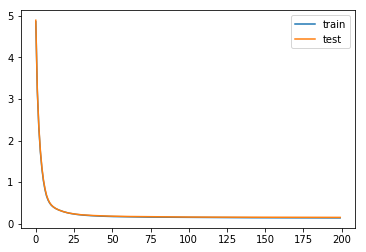

Test loss: 0.152370
epoch 91, train loss: 0.158827
epoch 92, train loss: 0.158790
epoch 93, train loss: 0.158437
epoch 94, train loss: 0.158150
epoch 95, train loss: 0.157962
epoch 96, train loss: 0.157816
epoch 97, train loss: 0.157786
epoch 98, train loss: 0.157435
epoch 99, train loss: 0.157146
epoch 100, train loss: 0.157204
epoch 101, train loss: 0.156510
epoch 102, train loss: 0.156366
epoch 103, train loss: 0.156276
epoch 104, train loss: 0.156158
epoch 105, train loss: 0.155861
epoch 106, train loss: 0.155459
epoch 107, train loss: 0.155482
epoch 108, train loss: 0.154959
epoch 109, train loss: 0.154952
epoch 110, train loss: 0.154673
epoch 111, train loss: 0.154581
epoch 112, train loss: 0.154204
epoch 113, train loss: 0.154213
epoch 114, train loss: 0.154171
epoch 115, train loss: 0.153970
epoch 116, train loss: 0.153884
epoch 117, train loss: 0.153339
epoch 118, train loss: 0.153215
epoch 119, train loss: 0.153243
epoch 120, train loss: 0.153209
epoch 121, train loss: 0.1529

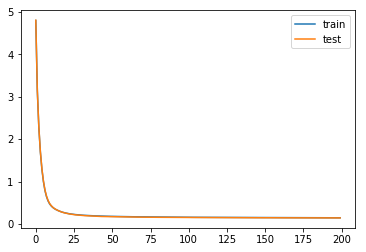

Test loss: 0.141922
epoch 91, train loss: 0.148664
epoch 92, train loss: 0.148441
epoch 93, train loss: 0.148018
epoch 94, train loss: 0.147674
epoch 95, train loss: 0.147523
epoch 96, train loss: 0.147094
epoch 97, train loss: 0.146598
epoch 98, train loss: 0.146290
epoch 99, train loss: 0.145829
epoch 100, train loss: 0.145604
epoch 101, train loss: 0.145508
epoch 102, train loss: 0.145026
epoch 103, train loss: 0.144867
epoch 104, train loss: 0.144313
epoch 105, train loss: 0.144249
epoch 106, train loss: 0.144434
epoch 107, train loss: 0.144059
epoch 108, train loss: 0.143861
epoch 109, train loss: 0.143388
epoch 110, train loss: 0.143424
epoch 111, train loss: 0.143195
epoch 112, train loss: 0.142813
epoch 113, train loss: 0.142309
epoch 114, train loss: 0.142282
epoch 115, train loss: 0.141988
epoch 116, train loss: 0.141597
epoch 117, train loss: 0.141494
epoch 118, train loss: 0.141312
epoch 119, train loss: 0.141014
epoch 120, train loss: 0.140917
epoch 121, train loss: 0.1407

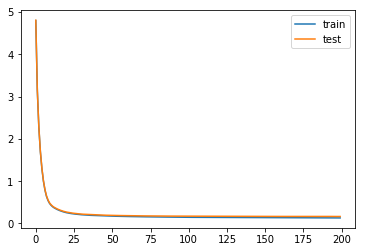

Test loss: 0.164903
5-fold validation: avg train loss: 0.139344, avg test loss: 0.154122


In [23]:
train_loss, test_loss = k_fold_cross_valid(k, epochs, verbose_epoch, X_train, y_train, learning_rate, weight_decay)
print('%d-fold validation: avg train loss: %f, avg test loss: %f' %(k, train_loss, test_loss))

In [24]:
# 预测函数
def learn(epochs, verbose_epoch, X_train, y_train, test, learning_rate, weight_decay):
    net = get_net()
    train(net, X_train, y_train, None, None, epochs, verbose_epoch, learning_rate, weight_decay)
    preds = net(X_test).asnumpy()
    test['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test['Id'], test['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

epoch 91, train loss: 0.150480
epoch 92, train loss: 0.150078
epoch 93, train loss: 0.150120
epoch 94, train loss: 0.149554
epoch 95, train loss: 0.149379
epoch 96, train loss: 0.149263
epoch 97, train loss: 0.149075
epoch 98, train loss: 0.148924
epoch 99, train loss: 0.148682
epoch 100, train loss: 0.148392
epoch 101, train loss: 0.148032
epoch 102, train loss: 0.148076
epoch 103, train loss: 0.147789
epoch 104, train loss: 0.147680
epoch 105, train loss: 0.147704
epoch 106, train loss: 0.147605
epoch 107, train loss: 0.147086
epoch 108, train loss: 0.147011
epoch 109, train loss: 0.146671
epoch 110, train loss: 0.146541
epoch 111, train loss: 0.146446
epoch 112, train loss: 0.146329
epoch 113, train loss: 0.146076
epoch 114, train loss: 0.145994
epoch 115, train loss: 0.145725
epoch 116, train loss: 0.145684
epoch 117, train loss: 0.145519
epoch 118, train loss: 0.145195
epoch 119, train loss: 0.145261
epoch 120, train loss: 0.145019
epoch 121, train loss: 0.144841
epoch 122, train 

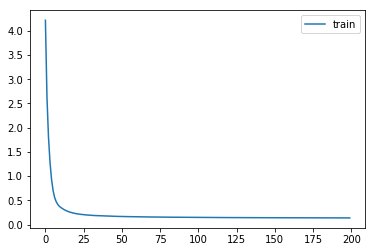

In [25]:
learn(epochs, verbose_epoch, X_train, y_train, test, learning_rate, weight_decay)